In [1]:
import pyfa_tool as pyfa
print(pyfa.__version__)

0.0.2a


## The different pyfa classes
There are 3 classes in pyfa that you can use and create. Each of these classes has a specific application, which must be used accordingly by the user. 
* The **FaFile**class: For quick and fast inspection of what can be found in an FA file
* The **FaDataset** class: Holds data and methods to work with a xarray.Dataset equivalent of the FA file.
* The **FaCollection** class: Holds methods on how to combine multiple FaDatasets.

In this example, we will introduce the most common functionalities of FaFile and FaDataset classes.

## FaFile : Fast overview of the Fa content
We start by defining the paths to the FA files we want to use in pyfa. We use the demo FA file for this example.
Then we create a FaFile object for the demo FA file.

In [2]:
fa_filepath = pyfa.demo_fa_climate
print(fa_filepath)

#Now we create a FaFile object
fafile = pyfa.FaFile(fafile=fa_filepath)
print(fafile)

/home/thoverga/Documents/github/PyFa-tool/tests/data/ICMSHABOF+0732
FA-file at /home/thoverga/Documents/github/PyFa-tool/tests/data/ICMSHABOF+0732


The FaFile holds only the meta-data and fieldnames from the FA file. You can get them using these getters, which can be handy if you want a deep inspection.

In [3]:
fieldnames_dataframe = fafile.get_fieldnames()
print(fieldnames_dataframe.head()) #Print only the first lines

metadata = fafile.get_metadata()
print(metadata) #The metadata is stored in a dictionary

               name  offset  length  spectral  nbits  index  sptrunc  sppow
0   PROFTEMPERATURE   77128  145888     False   16.0      8      NaN    NaN
1    PROFRESERV.EAU  223016  145888     False   16.0      9      NaN    NaN
2  PROFRESERV.GLACE  368904  145888     False   16.0     10      NaN    NaN
3  SURFRESERV.NEIGE  514792  145888     False   16.0     11      NaN    NaN
4  SURFALBEDO NEIGE  660680  145888     False   16.0     12      NaN    NaN
{'basedate': ['2022-12-01'], 'validate': ['2022-12-31 12:00:00'], 'leadtime': ['732'], 'timestep': ['450'], 'origin': ['/home/thoverga/Documents/github/PyFa-tool/tests/data/ICMSHABOF+0732'], 'projection': ['lcc'], 'lon_0': [9.9], 'lat_1': [49], 'lat_2': [49], 'proj_R': [6371229], 'nx': [251], 'ny': [251], 'dx': [25000], 'dy': [25000], 'ex': [19], 'ey': [19], 'center_lon': [9.9], 'center_lat': [49], 'nfields': [410], 'filepath': ['/home/thoverga/Documents/github/PyFa-tool/tests/data/ICMSHABOF+0732'], 'ndlux': [251], 'ndgux': [251], 'nsmax'

An general, a formatted description of what is in the FA file is handyer. The describe() prints out an overview of the FA content:

In [4]:
fafile.describe()


### File format : FA

## File name: ['/home/thoverga/Documents/github/PyFa-tool/tests/data/ICMSHABOF+0732']
## File path: ['/home/thoverga/Documents/github/PyFa-tool/tests/data/ICMSHABOF+0732']

#################
##   VALIDITY  ##
#################

Validity               : 2022-12-31 12:00:00
Basedate               : 2022-12-01 00:00:00
Leadtime               : 30 days, 12:00:00

Timestep               : 0:07:30
N time iterations      : 5856


#######################
## HORIZONTAL GEOMETRY
#######################

Points of C+I in X      : 251
Points of C+I in Y      : 251

Kind of projection      : lcc
Reference lat (ELAT0)   : 49
Reference lon (ELON0)   : 9.9
Center lat              : 49
Center lon              : 9.9

Resolution in X (m)     : 25000
Resolution in Y (m)     : 25000


#######################
## Vertical GEOMETRY
#######################
N levels                : 46
Ref pressure            : 101325

Vert coords A           :
[0, 0.0001, 0.0003, 0.0007, 0.0013, 0.0023, 

## FaDataset Class

The FaFile class was just for printing out and inspecting the metadata of a FA file. If we want to use the data itself, we need the FaDataset class.

The FaDataset class is designed to convert a Fa file to an xarray.Dataset object, which will be stored as the `ds` attribute. You can directly use and manipulate this attribute if you like. 

There are three methods to import a FA file (*importing means to convert an FA file to an xarray.Dataset*):
* using `import_2d_field()`: This method is designed to only import a single two-dimensional field.
* using `import_3d_field()`: This methods is designed to import all 2d fields to construct a 3d field. This is done by specifying a `basename` which is the equivalent of the fieldname but without the level specifier. i.g. *TEMPERATURE* is the `basename` for all 2d fields like *S001TEMPERATURE*, *S002TEMPERATURE*, ...
*  using `import_fa()`: This is a general method where you have control over all the fields (2d and 3d) that will be imported.


### Import a 2D and 3D field
We saw in the .describe of the fafile that `CLSVENT.ZONAL` (2d) and `WIND.V.PHYS` (3d) are available. As an example we will read these fields separately:


In [5]:
# Import the CLS zonal 2D field as a dataset
cls_wind_data = pyfa.FaDataset(fafile=pyfa.demo_fa_climate)
cls_wind_data.import_2d_field(fieldname='CLSVENT.ZONAL')
print(cls_wind_data) 


[1] "PROFTEMPERATURE  not in whitelist"
[1] "PROFRESERV.EAU   not in whitelist"
[1] "PROFRESERV.GLACE not in whitelist"
[1] "SURFRESERV.NEIGE not in whitelist"
[1] "SURFALBEDO NEIGE not in whitelist"
[1] "SURFDENSIT.NEIGE not in whitelist"
[1] "SURFALBEDO HISTO not in whitelist"
[1] "SURFTEMPERATURE  not in whitelist"
[1] "SURFRESERV.EAU   not in whitelist"
[1] "SURFRESERV.INTER not in whitelist"
[1] "SURFRESERV.GLACE not in whitelist"
[1] "SURFZ0.FOIS.G    not in whitelist"
[1] "SURFALBEDO       not in whitelist"
[1] "SURFEMISSIVITE   not in whitelist"
[1] "SURFET.GEOPOTENT not in whitelist"
[1] "SURFIND.TERREMER not in whitelist"
[1] "SURFPROP.VEGETAT not in whitelist"
[1] "SURFVAR.GEOP.ANI not in whitelist"
[1] "SURFVAR.GEOP.DIR not in whitelist"
[1] "SURFPROP.ARGILE  not in whitelist"
[1] "SURFPROP.SABLE   not in whitelist"
[1] "SURFEPAIS.SOL    not in whitelist"
[1] "SURFIND.VEG.DOMI not in whitelist"
[1] "SURFRESI.STO.MIN not in whitelist"
[1] "SURFIND.FOLIAIRE not in whitelist"


*Note: You can see that the dimensions of the xarray.dataset include the levels even for a 2D field. This is done so all methods are applicable on all types of dataset 2d, 3d or a combination of both. If you look carefully you can see that the variable `CLSVENT.ZONAL` has only the `(y, x)` dimensions, so it is a 2d field.*

In [6]:
#if you want to work directly with the xarray dataset you can do this by working with the .ds attribute:
cls_wind_data.ds['CLSVENT.ZONAL'].data.max()


21.2439

In [7]:
# Import the WIND.V.PHYS 3D field as a dataset
d3wind_data = pyfa.FaDataset(fafile=pyfa.demo_fa_climate)
d3wind_data.import_3d_field(fieldname='WIND.V.PHYS')
print(d3wind_data) 

[1] "PROFTEMPERATURE  not in whitelist"
[1] "PROFRESERV.EAU   not in whitelist"
[1] "PROFRESERV.GLACE not in whitelist"
[1] "SURFRESERV.NEIGE not in whitelist"
[1] "SURFALBEDO NEIGE not in whitelist"
[1] "SURFDENSIT.NEIGE not in whitelist"
[1] "SURFALBEDO HISTO not in whitelist"
[1] "SURFTEMPERATURE  not in whitelist"
[1] "SURFRESERV.EAU   not in whitelist"
[1] "SURFRESERV.INTER not in whitelist"
[1] "SURFRESERV.GLACE not in whitelist"
[1] "SURFZ0.FOIS.G    not in whitelist"
[1] "SURFALBEDO       not in whitelist"
[1] "SURFEMISSIVITE   not in whitelist"
[1] "SURFET.GEOPOTENT not in whitelist"
[1] "SURFIND.TERREMER not in whitelist"
[1] "SURFPROP.VEGETAT not in whitelist"
[1] "SURFVAR.GEOP.ANI not in whitelist"
[1] "SURFVAR.GEOP.DIR not in whitelist"
[1] "SURFPROP.ARGILE  not in whitelist"
[1] "SURFPROP.SABLE   not in whitelist"
[1] "SURFEPAIS.SOL    not in whitelist"
[1] "SURFIND.VEG.DOMI not in whitelist"
[1] "SURFRESI.STO.MIN not in whitelist"
[1] "SURFIND.FOLIAIRE not in whitelist"


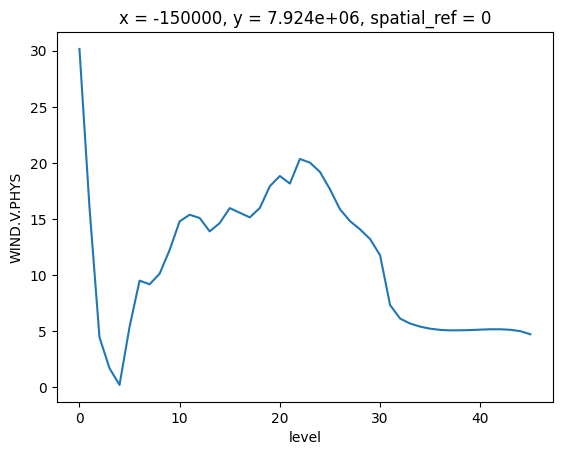

In [8]:
#basic windprofile at a random location
d3wind_data.ds['WIND.V.PHYS'].sel(x=-150000, y=7923687.901).plot()

In [9]:
# Import multiple fields

full_data = pyfa.FaDataset(fafile=pyfa.demo_fa_climate)

# To import all fields: 
#(Whitelist specifies all the fields (2d and 3d) to read, blacklist are all the fields to skip)

#This can take a couple of seconds.
full_data.import_fa(whitelist=None, #If none, all fields are interpreted as white 
                    blacklist=None, #If none, blacklist is empty
                   )
print(full_data.get_fieldnames())

[1] "PROFTEMPERATURE  reading ..."
[1] "PROFRESERV.EAU   reading ..."
[1] "PROFRESERV.GLACE reading ..."
[1] "SURFRESERV.NEIGE reading ..."
[1] "SURFALBEDO NEIGE reading ..."
[1] "SURFDENSIT.NEIGE reading ..."
[1] "SURFALBEDO HISTO reading ..."
[1] "SURFTEMPERATURE  reading ..."
[1] "SURFRESERV.EAU   reading ..."
[1] "SURFRESERV.INTER reading ..."
[1] "SURFRESERV.GLACE reading ..."
[1] "SURFZ0.FOIS.G    reading ..."
[1] "SURFALBEDO       reading ..."
[1] "SURFEMISSIVITE   reading ..."
[1] "SURFET.GEOPOTENT reading ..."
[1] "SURFIND.TERREMER reading ..."
[1] "SURFPROP.VEGETAT reading ..."
[1] "SURFVAR.GEOP.ANI reading ..."
[1] "SURFVAR.GEOP.DIR reading ..."
[1] "SURFPROP.ARGILE  reading ..."
[1] "SURFPROP.SABLE   reading ..."
[1] "SURFEPAIS.SOL    reading ..."
[1] "SURFIND.VEG.DOMI reading ..."
[1] "SURFRESI.STO.MIN reading ..."
[1] "SURFIND.FOLIAIRE reading ..."
[1] "SURFRES.EVAPOTRA reading ..."
[1] "SURFGZ0.THERM    reading ..."
[1] "SURFALBEDO.SOLNU reading ..."
[1] "SURFALBEDO.VEG 

An Error Occurred for this 3d field
An Error Occurred for this 3d field


[1] "TEMPERATURE  reading ..."
[1] "WIND.U.PHYS  reading ..."
[1] "WIND.V.PHYS  reading ..."


Warning messages:
1: In FAdec.FAfile(fa, fields) :
  Fields S002RAYT SOL CL , S003RAYT SOL CL , S004RAYT SOL CL , S005RAYT SOL CL , S006RAYT SOL CL , S007RAYT SOL CL , S008RAYT SOL CL , S009RAYT SOL CL , S010RAYT SOL CL , S011RAYT SOL CL , S012RAYT SOL CL , S013RAYT SOL CL , S014RAYT SOL CL , S015RAYT SOL CL , S016RAYT SOL CL , S017RAYT SOL CL , S018RAYT SOL CL , S019RAYT SOL CL , S020RAYT SOL CL , S021RAYT SOL CL , S022RAYT SOL CL , S023RAYT SOL CL , S024RAYT SOL CL , S025RAYT SOL CL , S026RAYT SOL CL , S027RAYT SOL CL , S028RAYT SOL CL , S029RAYT SOL CL , S030RAYT SOL CL , S031RAYT SOL CL , S032RAYT SOL CL , S033RAYT SOL CL , S034RAYT SOL CL , S035RAYT SOL CL , S036RAYT SOL CL , S037RAYT SOL CL , S038RAYT SOL CL , S039RAYT SOL CL , S040RAYT SOL CL , S041RAYT SOL CL , S042RAYT SOL CL , S043RAYT SOL CL , S044RAYT SOL CL , S045RAYT SOL CL  not found.
2: In FAdec.FAfile(fa, fields) :
  Fields S002RAYT THER CL, S003RAYT THER CL, S004RAYT THER CL, S005RAYT THER CL, S006RAYT THER CL, S007RA

Reading json data
['PROFTEMPERATURE', 'PROFRESERV.EAU', 'PROFRESERV.GLACE', 'SURFRESERV.NEIGE', 'SURFALBEDO NEIGE', 'SURFDENSIT.NEIGE', 'SURFALBEDO HISTO', 'SURFTEMPERATURE', 'SURFRESERV.EAU', 'SURFRESERV.INTER', 'SURFRESERV.GLACE', 'SURFZ0.FOIS.G', 'SURFALBEDO', 'SURFEMISSIVITE', 'SURFET.GEOPOTENT', 'SURFIND.TERREMER', 'SURFPROP.VEGETAT', 'SURFVAR.GEOP.ANI', 'SURFVAR.GEOP.DIR', 'SURFPROP.ARGILE', 'SURFPROP.SABLE', 'SURFEPAIS.SOL', 'SURFIND.VEG.DOMI', 'SURFRESI.STO.MIN', 'SURFIND.FOLIAIRE', 'SURFRES.EVAPOTRA', 'SURFGZ0.THERM', 'SURFALBEDO.SOLNU', 'SURFALBEDO.VEG', 'SURFAEROS.SEA', 'SURFAEROS.LAND', 'SURFAEROS.SOOT', 'SURFAEROS.DESERT', 'SURFA.OF.OZONE', 'SURFB.OF.OZONE', 'SURFC.OF.OZONE', 'SUNSHI. DURATION', 'SURFNEBUL.TOTALE', 'SURFNEBUL.CONVEC', 'SURFNEBUL.HAUTE', 'SURFNEBUL.MOYENN', 'SURFNEBUL.BASSE', 'SURFCAPE.MOD.XFU', 'CLPMOCON.MOD.XFU', 'CLSVENT.ZONAL', 'CLSVENT.MERIDIEN', 'CLSTEMPERATURE', 'CLSHUMI.RELATIVE', 'CLSHUMI.SPECIFIQ', 'CLSMINI.H.TEMPER', 'CLSMAXI.H.TEMPER', 'CLPMHAUT

In [10]:
# If you are only interested in a certain set of field, you can set the white and blacklist accordingly:
full_data.import_fa(whitelist=["PROFTEMPERATURE", "SURFALBEDO.VEG", "TEMPERATURE"], 
                    blacklist=None, #If none, blacklist is empty
                   )

print(full_data)

[1] "PROFTEMPERATURE  reading ..."
[1] "PROFRESERV.EAU   not in whitelist"
[1] "PROFRESERV.GLACE not in whitelist"
[1] "SURFRESERV.NEIGE not in whitelist"
[1] "SURFALBEDO NEIGE not in whitelist"
[1] "SURFDENSIT.NEIGE not in whitelist"
[1] "SURFALBEDO HISTO not in whitelist"
[1] "SURFTEMPERATURE  not in whitelist"
[1] "SURFRESERV.EAU   not in whitelist"
[1] "SURFRESERV.INTER not in whitelist"
[1] "SURFRESERV.GLACE not in whitelist"
[1] "SURFZ0.FOIS.G    not in whitelist"
[1] "SURFALBEDO       not in whitelist"
[1] "SURFEMISSIVITE   not in whitelist"
[1] "SURFET.GEOPOTENT not in whitelist"
[1] "SURFIND.TERREMER not in whitelist"
[1] "SURFPROP.VEGETAT not in whitelist"
[1] "SURFVAR.GEOP.ANI not in whitelist"
[1] "SURFVAR.GEOP.DIR not in whitelist"
[1] "SURFPROP.ARGILE  not in whitelist"
[1] "SURFPROP.SABLE   not in whitelist"
[1] "SURFEPAIS.SOL    not in whitelist"
[1] "SURFIND.VEG.DOMI not in whitelist"
[1] "SURFRESI.STO.MIN not in whitelist"
[1] "SURFIND.FOLIAIRE not in whitelist"
[1] "

## Usefull Dataset methods
Here is a collection of useful data methods:

### Get info
Some methods useful for extracting info

In [11]:
print(f' fieldnames: {full_data.get_fieldnames()}')
print(f' basedate: {full_data.get_basedate()}')
print(f' leadtime: {full_data.get_leadtime()}')

 fieldnames: ['PROFTEMPERATURE', 'SURFALBEDO.VEG', 'TEMPERATURE']
 basedate: 2022-12-01 00:00:00
 leadtime: 30 days 12:00:00


### Plot and reproject
A geospatial plot method is available to plot 2d fields or a 2d crosssection of a 3d field. If the coordinates are in lat-lon, the land and sea borders can be drawn as well. 

<Axes: title={'center': 'TEMPERATURE at 2022-12-31 12:00:00 (UTC, LT=30 days 12:00:00)'}, xlabel='x', ylabel='y'>

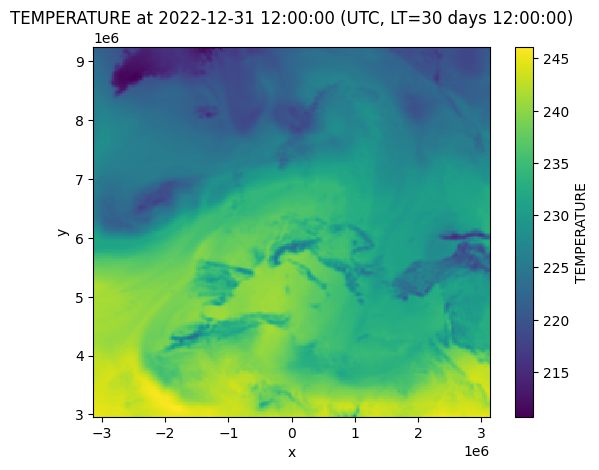

In [12]:
#make a plot at the model CRS (without reprojectiong)
full_data.plot(variable='TEMPERATURE', level=21)

Reprojecting dataset to EPSG:4326.


<GeoAxes: title={'center': 'PROFTEMPERATURE at 2022-12-31 12:00:00 (UTC, LT=30 days 12:00:00)'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

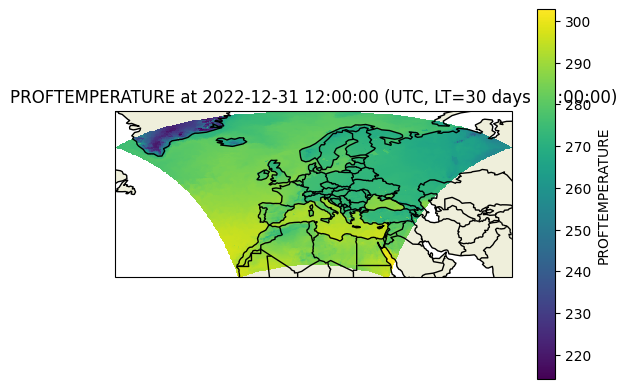

In [13]:
#First we reproject to latlon using the epsg code
full_data.reproject(target_epsg='EPSG:4326')

# Then we plot a field
full_data.plot(variable='PROFTEMPERATURE',
               level=None, #only required for 3d fields
               title=None, # 
               grid=False,
               land=None, #if in latlon, then this will we set to True by default and the boarders are drawn
               coastline=None, #equivalent to land
               contour=False, #Set to true if you want a contour plot
               contour_levels=10, #only used if contour
               # **kwargs,
               cmap = 'viridis', #kwargs passed to xarray.plot()
              )

## Saving an opening netCDF 
We can save the FA data to a netCDF file format, which can be opened or used by many other programs.

In [14]:

import os
outputfolder = os.getcwd() #specify an output folder

full_data.save_nc(outputfolder = outputfolder,
                  filename='some_fields_of_the_demo_fa_file.nc',
                  overwrite=True)

Data saved to /home/thoverga/Documents/github/PyFa-tool/examples/some_fields_of_the_demo_fa_file.nc


To read a netcdf file, you can use xarray or use the pyfa method (wrapper on xarray.read_netDF)

In [15]:
path_to_nc = os.path.join(outputfolder,'some_fields_of_the_demo_fa_file.nc')
new_dataset = pyfa.FaDataset()
new_dataset.read_nc(path_to_nc)

netCDF loaded.
